## Project description

<b>Context</b><br/>
The first task: to help marketers reduce costs-to abandon unprofitable sources of traffic and reallocate the budget.<br/><br/>
There are data from June 2017 to the end of May 2018:<br/>
* server log with data on site visits,<br/> 
* unloading of all orders for this period,<br/> 
* statistics of advertising expenses.<br/><br/>

We have to study:<br/>
* how customers use the service,<br/>
* when making their first purchases on the site,<br/>
* how much money does each client bring to the company,<br/>
* when the cost of attracting a customer pays off.<br/>

Revenue is measured in $

## Step 1. Let's download the data and prepare it for analysis

In [1]:
# all imports

import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
from scipy.stats import norm
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Paste the path to the file on your computer
path = '/Users/Andrej/Desktop/'

visits = pd.read_csv(path + 'visits_log.csv')
orders = pd.read_csv(path + 'orders_log.csv')
costs = pd.read_csv(path + 'costs.csv')

pd.set_option('max_columns', None)

In [3]:
visits = visits.rename(str.lower, axis='columns')
display(visits)

orders = orders.rename(str.lower, axis='columns')
display(orders)

costs.set_axis(['source id', 'dt', 'costs'], axis = "columns", inplace = True) 
display(costs)

,device,end ts,source id,start ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


,buy ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


,source id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


### Let's prepare the data. Let's make sure that the data type in all the columns matches the values stored in them.

In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   device     359400 non-null  object
 1   end ts     359400 non-null  object
 2   source id  359400 non-null  int64 
 3   start ts   359400 non-null  object
 4   uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [5]:
visits['end ts'] = pd.to_datetime(visits['end ts'], format = '%Y.%m.%d %H:%M:%S')
visits['start ts'] = pd.to_datetime(visits['start ts'], format = '%Y.%m.%d %H:%M:%S')

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   buy ts   50415 non-null  object 
 1   revenue  50415 non-null  float64
 2   uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [7]:
orders['buy ts'] = pd.to_datetime(orders['buy ts'], format = '%Y.%m.%d %H:%M:%S')

In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [9]:
costs['dt'] = pd.to_datetime(costs['dt'], format = '%Y-%m-%d')

## Step 2. Calculate metrics and build graphs

Let's calculate three types of metrics:<br/>
* product,<br/>
* business,<br/>
* marketing.<br/>

We will display the changes in each metric over time on the graphs.

### Product metrics

#### Calculate DAU, WAU, and MAU. Let's calculate the average values of these metrics for the entire period

In [10]:
visits['visit_day'] = visits['start ts'].dt.date
visits['visit_week'] = visits['start ts'].astype('datetime64[W]')
visits['visit_month'] = visits['start ts'].astype('datetime64[M]')

Text(0, 0.5, 'Number of unique visits')

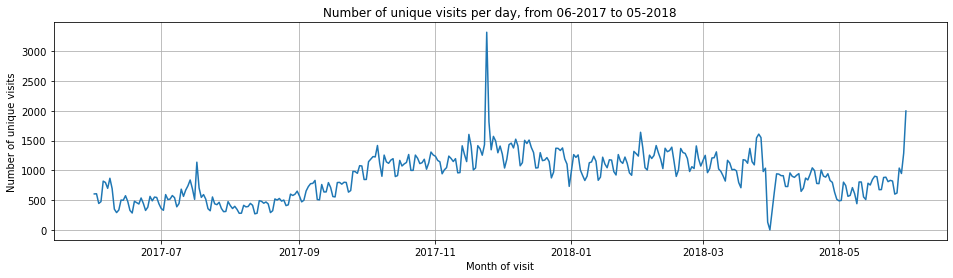

In [11]:
visits.groupby('visit_day')['uid'].nunique().plot(figsize = (16, 4), grid = True)
plt.title('Number of unique visits per day, from 06-2017 to 05-2018')
plt.xlabel('Month of visit')
plt.ylabel('Number of unique visits')

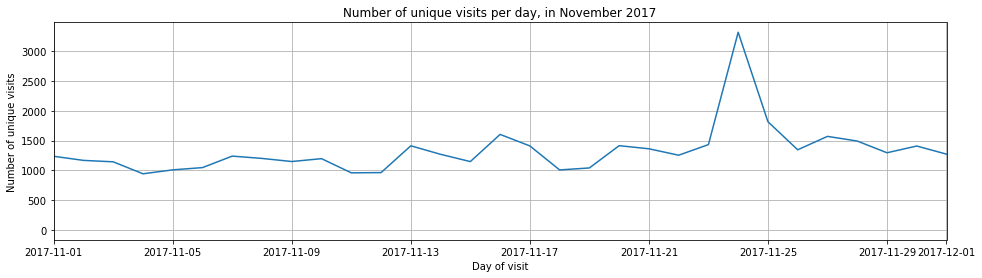

In [12]:
visits.groupby('visit_day')['uid'].nunique().plot(figsize = (16, 4), grid = True)
plt.title('Number of unique visits per day, in November 2017')
plt.xlabel('Day of visit')
plt.ylabel('Number of unique visits')
plt.xlim(['2017-11', '2017-12'])
plt.show()

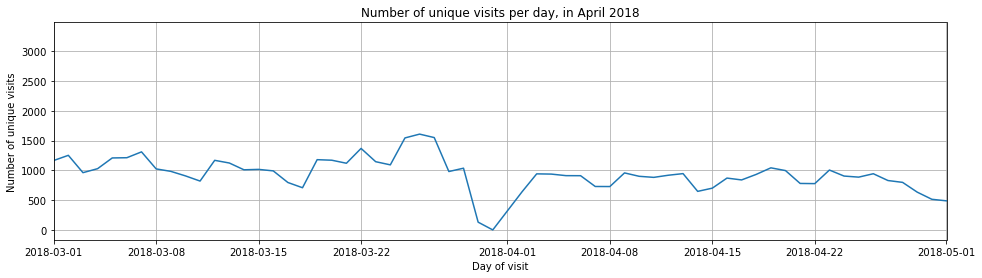

In [13]:
visits.groupby('visit_day')['uid'].nunique().plot(figsize = (16, 4), grid = True)
plt.title('Number of unique visits per day, in April 2018')
plt.xlabel('Day of visit')
plt.ylabel('Number of unique visits')
plt.xlim(['2018-03', '2018-05'])
plt.show()

Text(0, 0.5, 'Number of unique visits')

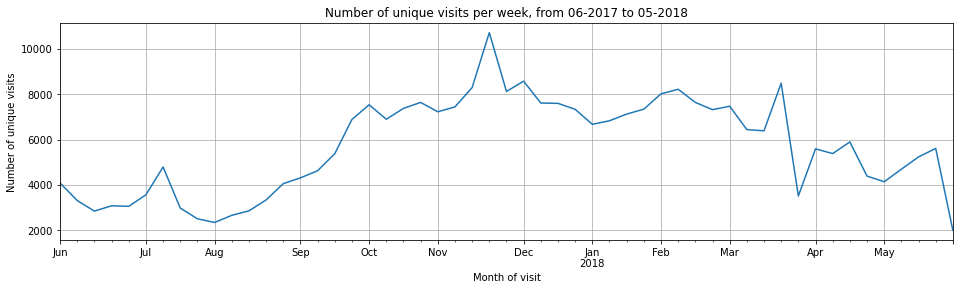

In [14]:
visits.groupby('visit_week')['uid'].nunique().plot(figsize = (16, 4), grid = True)
plt.title('Number of unique visits per week, from 06-2017 to 05-2018')
plt.xlabel('Month of visit')
plt.ylabel('Number of unique visits')

Text(0, 0.5, 'Number of unique visits')

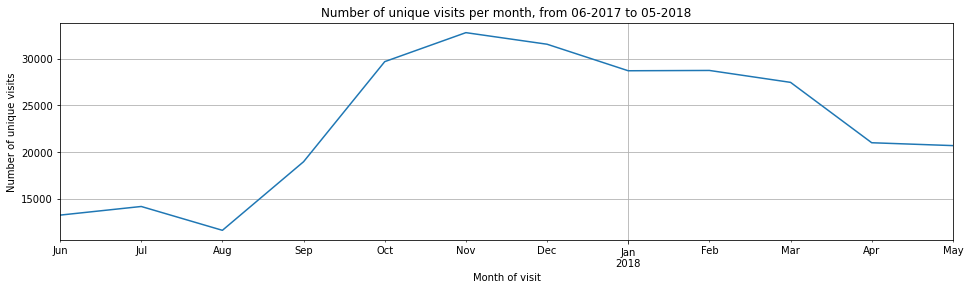

In [15]:
visits.groupby('visit_month')['uid'].nunique().plot(figsize = (16, 4), grid = True)
plt.title('Number of unique visits per month, from 06-2017 to 05-2018')
plt.xlabel('Month of visit')
plt.ylabel('Number of unique visits')

In [16]:
visits.head()

,device,end ts,source id,start ts,uid,visit_day,visit_week,visit_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01


In [17]:
dau_total = visits.groupby(['visit_day']).agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby(['visit_week']).agg({'uid': 'nunique'}).mean()
mau_total = visits.groupby(['visit_month']).agg({'uid': 'nunique'}).mean()

display('All-time average DAU value:', dau_total)
display('Average value of WAU for all time:', wau_total)
display('Average value of WAU for all time:', mau_total)

'All-time average DAU value:'

uid    907.991758
dtype: float64

'Average value of WAU for all time:'

uid    5724.415094
dtype: float64

'Average value of WAU for all time:'

uid    23228.416667
dtype: float64

<b>Intermediate output:</b><br/>
All-time average DAU value-907.99<br/>
Average value of WAU for all time - 5716.24<br/>
Average MAU value for all time - 23228.41<br/>

2017-12 we see a significant increase in DAU. Probably everyone remembered about the upcoming holidays.

#### Let's determine how many times per day users visit the site on average

In [18]:
visits['session_year'] = visits['start ts'].dt.year
visits['session_month'] = visits['start ts'].dt.month
sessions_per_user = visits.groupby(['session_year', 'session_month']).agg({'uid': ['count', 'nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = (sessions_per_user['n_sessions'] / sessions_per_user['n_users'])

In [19]:
display(sessions_per_user)

n_sessions  n_users  sessions_per_user
session_year session_month                                        
2017         6                   16505    13259           1.244815
             7                   17828    14183           1.256998
             8                   14355    11631           1.234202
             9                   23907    18975           1.259921
             10                  37903    29692           1.276539
             11                  43969    32797           1.340641
             12                  41983    31557           1.330386
2018         1                   36939    28716           1.286356
             2                   37182    28749           1.293332
             3                   35679    27473           1.298693
             4                   26515    21008           1.262138
             5                   26635    20701           1.286653

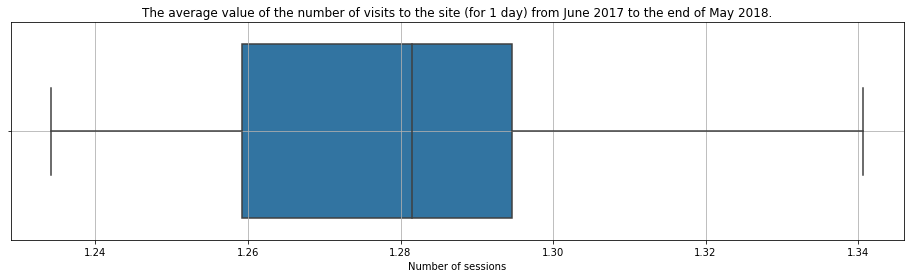

In [20]:
plt.figure(figsize = (16, 4))
plt.title('The average value of the number of visits to the site (for 1 day) from June 2017 to the end of May 2018.')
sns.boxplot(x = sessions_per_user['sessions_per_user'])
plt.xlabel('Number of sessions')
plt.grid()
plt.show()

<b>Intermediate output:</b><br/>
On average, users visit the site 1 time a day or more. The average values for the observed period are approximately equal.

#### We investigate how much time users spend on the site. Find out the duration of a typical user session for the entire period. To select the appropriate average measure, we will plot the distribution.

Average user session duration time: 643.5 сек


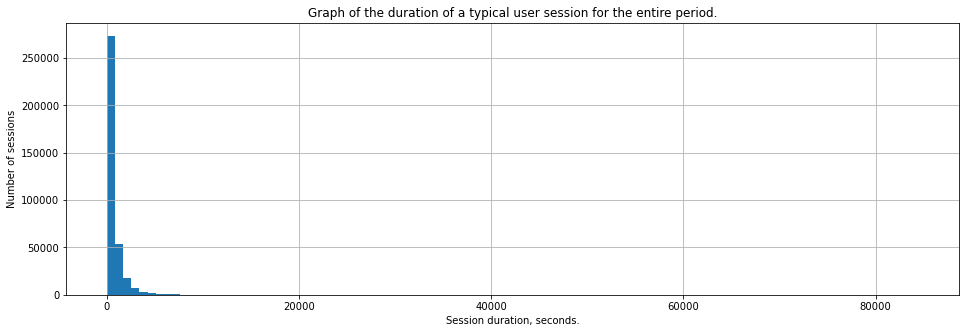

In [21]:
visits['session_duration_sec'] = (visits['end ts'] - visits['start ts']).dt.seconds
print('Average user session duration time: {:.1f} сек'.format(visits['session_duration_sec'].mean()))

plt.figure(figsize = (16, 5))
plt.title('Graph of the duration of a typical user session for the entire period.')
visits['session_duration_sec'].hist(bins = 100)
plt.ylabel('Number of sessions')
plt.xlabel('Session duration, seconds.')
plt.show()

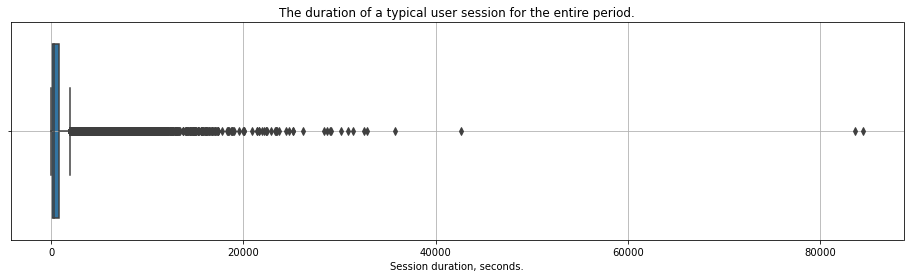

In [22]:
plt.figure(figsize = (16, 4))
plt.title('The duration of a typical user session for the entire period.')
sns.boxplot(x = visits['session_duration_sec'])
plt.xlabel('Session duration, seconds.')
plt.grid()
plt.show()

Several outliers within 23-24 hours, perhaps these are not closed tabs of the site. They have some effect on the average value.

<b>Intermediate output:</b><br/>
Average call duration: 643.5 seconds, about 10-11 minutes.<br/>
There are several abnormal values - 23-24 hours. We decide to save this data.<br/>
Most of the sessions are quite short.

#### We calculate the Retention Rate using cohort analysis. Let's find the average Retention Rate for the second month of the cohort's "life".

In [23]:
first_user_visit = visits.groupby('uid')['start ts'].min()
first_user_visit.name = 'first_visit'

visits = visits.join(first_user_visit, on = 'uid')

visits['first_visit_month'] = visits['first_visit'].astype('datetime64[M]')
visits['visit_month'] = visits['start ts'].astype('datetime64[M]')

visits['lifetime'] = visits['visit_month'] - visits['first_visit_month']
visits['lifetime'] = visits['lifetime'] / np.timedelta64(1, 'M')
visits['lifetime'] = visits['lifetime'].round()
visits['lifetime'] = visits['lifetime'].astype('int')

cohorts = visits.groupby(['first_visit_month', 'lifetime']).agg({'uid':'nunique'}).reset_index()

initial_users_count = cohorts[cohorts['lifetime'] == 0][['first_visit_month', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'}) 

cohorts = cohorts.merge(initial_users_count, on = 'first_visit_month') 
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users'] 

retention_pivot = cohorts.pivot_table(index = 'first_visit_month', columns = 'lifetime', values = 'retention', aggfunc = 'sum') 
display(retention_pivot)

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
cohorts = visits.pivot_table(index = 'first_visit_month', columns = 'lifetime', values = 'uid', aggfunc = 'nunique')
cohorts = cohorts.fillna('')
display(cohorts)
# User cohorts by month of life

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06-01,13259.0,1043,713,814,909,947,809,766,694,674,539,596
2017-07-01,13140.0,737,674,738,765,633,596,601,510,376,361,
2017-08-01,10181.0,783,640,639,510,448,370,402,284,265,,
2017-09-01,16704.0,1428,1156,847,658,632,599,404,381,,,
2017-10-01,25977.0,2042,1357,1012,890,837,555,529,,,,
2017-11-01,27248.0,2133,1202,1054,919,638,594,,,,,
2017-12-01,25268.0,1410,960,786,512,481,,,,,,
2018-01-01,22624.0,1351,890,565,458,,,,,,,
2018-02-01,22197.0,1267,565,446,,,,,,,,


Text(93.49999999999999, 0.5, 'User cohorts, grouped monthly.')

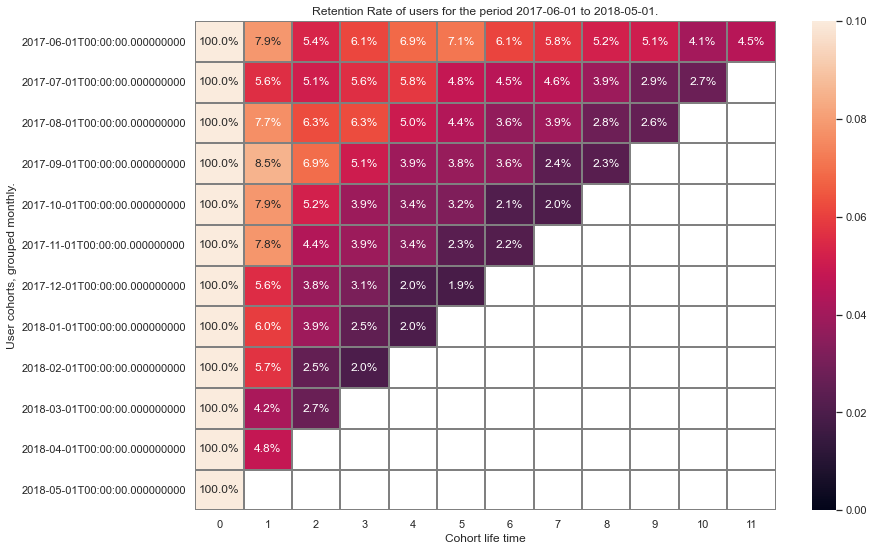

In [25]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Retention Rate of users for the period 2017-06-01 to 2018-05-01.')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmin=0, vmax=0.1)
plt.xlabel('Cohort life time')
plt.ylabel('User cohorts, grouped monthly.')

<b>Interim findings:< / b><br/><br/>
* Average Retention Rate for the second month of cohort life:<br/>
2017-06-01 7.9%<br/>
2017-07-01 5.6%<br/>
2017-08-01 7.7%<br/>
2017-09-01 8.5%<br/>
2017-10-01 7.9%<br/>
2017-11-01 7.8%<br/>
2017-12-01 5.6%<br/>
2018-01-01 6.0%<br/>
2018-02-01 5.7%<br/>
2018-03-01 4.2%<br/>
2018-04-01 4.8%<br/>
2018-05-01 nan<br/>
<br/>
The indicators decrease over time.

 ### Business metrics

#### We study how much time passes on average from the moment of the first visit to the site to making a purchase.

In [26]:
first_visits = visits.groupby('uid').agg({'start ts': 'min'}).reset_index()
first_visits.columns = ['uid', 'first start ts']
first_visits['first_session_dt'] = first_visits['first start ts'].dt.date
first_visits['first_session_month'] = first_visits['first start ts'].astype('datetime64[M]')

In [27]:
first_visits.head()

,uid,first start ts,first_session_dt,first_session_month
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02-01
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06-01
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01
4,325320750514679,2017-09-30 14:29:00,2017-09-30,2017-09-01


In [28]:
orders['buy ts'] = orders['buy ts'].dt.date
orders['order_month'] = orders['buy ts'].astype('datetime64[M]')

In [29]:
first_orders = orders.groupby('uid').agg({'buy ts': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_ts']

In [30]:
first_orders

,uid,first_order_ts
0,313578113262317,2018-01-03
1,1575281904278712,2017-06-03
2,2429014661409475,2017-10-11
3,2464366381792757,2018-01-28
4,2551852515556206,2017-11-24
...,...,...
36518,18445147675727495770,2017-11-24
36519,18445407535914413204,2017-09-22
36520,18445601152732270159,2018-03-26
36521,18446156210226471712,2018-02-18


In [31]:
first_orders['first_order_dt'] = pd.to_datetime(first_orders['first_order_ts'])
first_orders['first_order_month'] = first_orders['first_order_ts'].astype('datetime64[M]')

In [32]:
buyers = pd.merge(first_visits, first_orders, on = 'uid')

In [33]:
buyers.head()

,uid,first start ts,first_session_dt,first_session_month,first_order_ts,first_order_dt,first_order_month
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03,2017-06-03,2017-06-01
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11,2017-10-11,2017-10-01
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28,2018-01-28,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24,2017-11-24,2017-11-01


In [34]:
buyers['first_session_dt'] = pd.to_datetime(buyers['first_session_dt'])
buyers['first_order_ts'] = pd.to_datetime(buyers['first_order_ts'])
buyers['first start ts'] = pd.to_datetime(buyers['first start ts'])

In [35]:
buyers['days_to_first_purchase'] = (
    (buyers['first_order_ts'] - buyers['first start ts']) / np.timedelta64(1, 'D')).astype('int')

In [36]:
buyers.head()

,uid,first start ts,first_session_dt,first_session_month,first_order_ts,first_order_dt,first_order_month,days_to_first_purchase
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03,2018-01-03,2018-01-01,106
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03,2017-06-03,2017-06-01,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11,2017-10-11,2017-10-01,0
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28,2018-01-28,2018-01-01,0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24,2017-11-24,2017-11-01,0


Text(0, 0.5, 'Number of purchases')

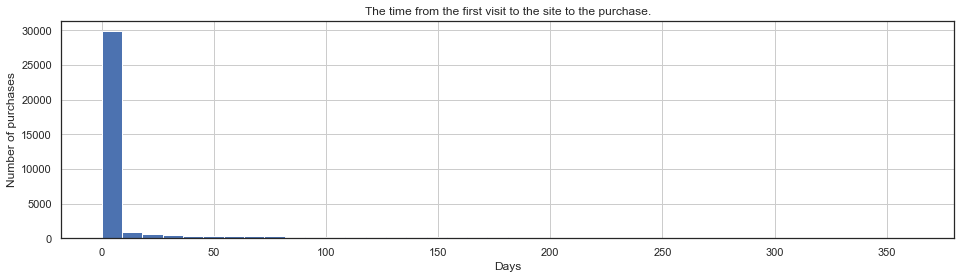

In [37]:
buyers['days_to_first_purchase'].hist(figsize = (16, 4), grid = True, bins = 40)
plt.title('The time from the first visit to the site to the purchase.')
plt.xlabel('Days')
plt.ylabel('Number of purchases')

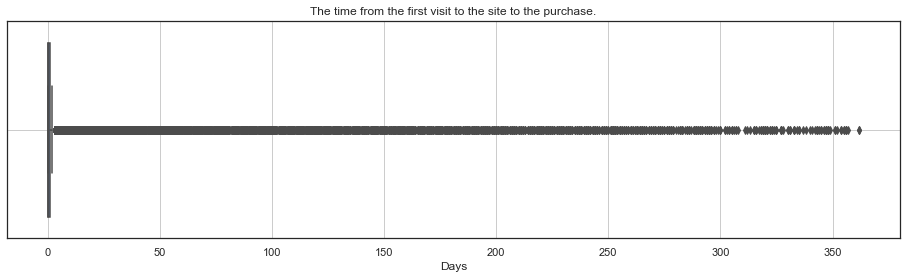

In [38]:
plt.figure(figsize = (16, 4))
plt.title('The time from the first visit to the site to the purchase.')
sns.boxplot(x = buyers['days_to_first_purchase'])
plt.xlabel('Days')
plt.grid()
plt.show()

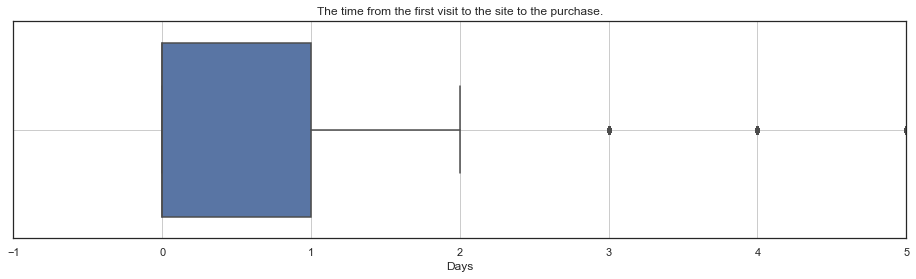

In [39]:
plt.figure(figsize = (16, 4))
plt.title('The time from the first visit to the site to the purchase.')
sns.boxplot(x = buyers['days_to_first_purchase'])
plt.xlabel('Days')
plt.xlim(-1, 5)
plt.grid()
plt.show()

In [40]:
buyers['days_to_first_purchase'].describe().T

count    36523.000000
mean        16.581716
std         46.827336
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        362.000000
Name: days_to_first_purchase, dtype: float64

<b>Interim findings:</b><br/>
75% of users make a purchase on the first day

#### Let's calculate the average number of purchases per customer for 6 months.

In [41]:
first_order_date_by_customers = orders.groupby('uid')['buy ts'].min()
first_order_date_by_customers.name = 'first_order_date'
orders = orders.join(first_order_date_by_customers, on = 'uid')
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders['order_month'] = orders['buy ts'].astype('datetime64[M]')

orders_grouped_by_cohorts = orders.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum', 'uid': 'nunique'})

In [42]:
orders

,buy ts,revenue,uid,order_month,first_order_date,first_order_month
0,2017-06-01,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01
...,...,...,...,...,...,...
50410,2018-05-31,4.64,12296626599487328624,2018-05-01,2018-05-31,2018-05-01
50411,2018-05-31,5.80,11369640365507475976,2018-05-01,2018-05-31,2018-05-01
50412,2018-05-31,0.30,1786462140797698849,2018-05-01,2018-05-31,2018-05-01
50413,2018-05-31,3.67,3993697860786194247,2018-05-01,2018-05-31,2018-05-01


In [43]:
orders.groupby('uid').agg({'buy ts': 'count'}).mean()

buy ts    1.380363
dtype: float64

<b>Interim findings:</b><br/>
The average number of purchases per customer, for the entire period, is about 1.5.

#### РLet's calculate the average bill

In [44]:
display(orders_grouped_by_cohorts.head()) 

revenue   uid
first_order_month order_month               
2017-06-01        2017-06-01   9557.49  2023
                  2017-07-01    981.82    61
                  2017-08-01    885.34    50
                  2017-09-01   1931.30    54
                  2017-10-01   2068.58    88

In [45]:
orders_grouped_by_cohorts['revenue_per_user'] = (orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts['uid'])

In [46]:
orders_grouped_by_cohorts.pivot_table(
    index='first_order_month',
    columns='order_month',
    values='revenue_per_user',
    aggfunc='mean',
).round(2)

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,4.72,16.10,17.71,35.76,23.51,22.21,31.01,25.03,19.30,27.23,25.68,9.80,NaN
2017-07-01,NaN,6.01,12.40,21.04,10.79,6.94,7.90,6.42,6.99,7.38,12.86,11.51,NaN
2017-08-01,NaN,NaN,5.28,11.15,11.85,12.18,16.92,12.14,9.62,12.61,21.07,8.31,NaN
2017-09-01,NaN,NaN,NaN,5.64,22.19,13.45,138.67,19.88,26.10,27.44,16.96,11.04,NaN
2017-10-01,NaN,NaN,NaN,NaN,5.00,11.29,6.75,7.41,7.07,7.26,6.57,7.48,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,5.15,7.34,6.79,12.51,7.46,4.58,7.56,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4.74,7.82,39.37,48.14,27.43,23.52,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.14,8.72,12.37,11.20,4.70,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.16,8.61,4.94,6.94,NaN


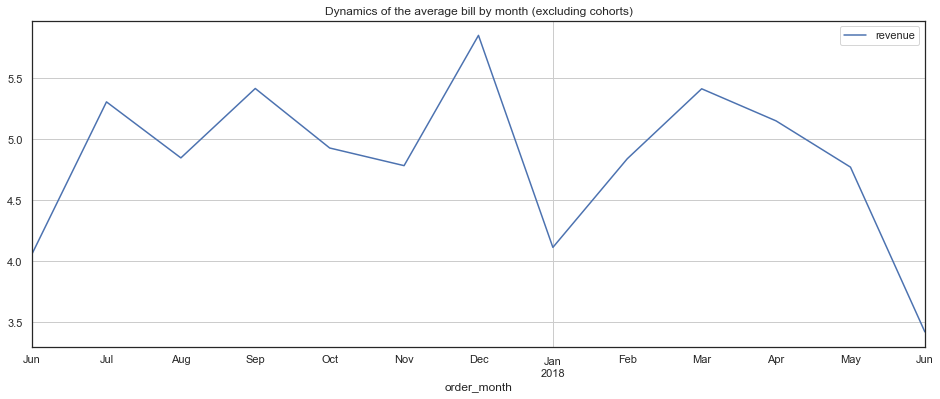

In [47]:
orders.pivot_table(index = ['order_month'], values = 'revenue', aggfunc = 'mean').plot(figsize = (16, 6), title = 'Dynamics of the average bill by month (excluding cohorts)')
plt.grid()
plt.show()

<b>Interim findings:</b><br/>
The average bill, in the context of the entire study period, is approximately the same, except for the months of the beginning and end of the study (probably the data is not complete). We can also see a jump in December and a subsequent drop in January, which is probably due to the purchase of New Year's gifts.

#### Let's find out how the LTV per buyer changes over time by cohort. Calculate the average LTV for the cohorts for 6 months. Marginality of the service — 100%

In [48]:
orders['buy ts'] = pd.to_datetime(orders['buy ts'])
orders['order_month'] = orders['buy ts'].astype('datetime64[M]')

In [49]:
first_order = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_order.columns = ['uid', 'first_order_month_1']
first_order.head()

,uid,first_order_month_1
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [50]:
cohort_sizes = first_order.groupby('first_order_month_1').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month_1', 'n_buyers']
cohort_sizes.head()

,first_order_month_1,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [51]:
order_new = pd.merge(orders, first_order, on = 'uid')
order_new.head()

,buy ts,revenue,uid,order_month,first_order_date,first_order_month,first_order_month_1
0,2017-06-01,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-06-01


In [52]:
cohort = order_new.groupby(['first_order_month_1', 'order_month']).agg({'revenue':'sum'}).reset_index()

In [53]:
cohort.head()

,first_order_month_1,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [54]:
report = pd.merge(cohort_sizes, cohort, on = 'first_order_month_1')
report.head()

,first_order_month_1,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [55]:
report['age'] = ((report['order_month'] - report['first_order_month_1']) / np.timedelta64(1, 'M')).round().astype('int')
report

,first_order_month_1,n_buyers,order_month,revenue,age
0,2017-06-01,2023,2017-06-01,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,4
...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,2
75,2018-04-01,2276,2018-04-01,10600.69,0
76,2018-04-01,2276,2018-05-01,1209.92,1
77,2018-05-01,2988,2018-05-01,13925.76,0


In [56]:
report['ltv'] = report.revenue / report.n_buyers

In [57]:
report.head()

,first_order_month_1,n_buyers,order_month,revenue,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531


In [58]:
ltv = report.pivot_table(index = 'first_order_month_1', columns = 'age', values = 'ltv', aggfunc = 'sum').cumsum(axis = 1)
ltv = ltv.fillna('')

In [59]:
ltv

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month_1,,,,,,,,,,,,
2017-06-01,4.724414,5.20974,5.64738,6.60205,7.62458,8.36008,9.31052,9.89212,10.4453,11.0511,11.6224,11.8792
2017-07-01,6.010218,6.34543,6.96896,7.32794,7.50473,7.66077,7.78098,7.9228,8.08404,8.23118,8.38685,
2017-08-01,5.276518,5.74851,6.20699,6.59827,7.09232,7.37586,7.58653,7.99153,8.28374,8.47172,,
2017-09-01,5.644529,6.76212,7.28305,11.2588,11.6594,12.3065,13.0081,13.2512,13.4352,,,
2017-10-01,5.003733,5.5395,5.73089,5.88803,6.03959,6.15996,6.24477,6.36024,,,,
2017-11-01,5.154683,5.55392,5.75347,6.07842,6.22644,6.28032,6.39524,,,,,
2017-12-01,4.738191,4.99856,5.92366,6.98894,7.30187,7.63991,,,,,,
2018-01-01,4.135636,4.43039,4.73468,4.87745,4.94015,,,,,,,
2018-02-01,4.156987,4.43526,4.51378,4.58792,,,,,,,,


In [60]:
ltv_source = ltv.reset_index().groupby(['first_order_month_1'])

In [61]:
display(ltv[5])  

first_order_month_1
2017-06-01    8.36008
2017-07-01    7.66077
2017-08-01    7.37586
2017-09-01    12.3065
2017-10-01    6.15996
2017-11-01    6.28032
2017-12-01    7.63991
2018-01-01           
2018-02-01           
2018-03-01           
2018-04-01           
2018-05-01           
2018-06-01           
Name: 5, dtype: object

In [62]:
lvt_ = ltv[5].reset_index()
lvt_ = lvt_.loc[:6]
lvt_.columns = ['first_order_month_1', 'ltv_6_month']

In [63]:
display(lvt_)

,first_order_month_1,ltv_6_month
0,2017-06-01,8.36008
1,2017-07-01,7.66077
2,2017-08-01,7.37586
3,2017-09-01,12.3065
4,2017-10-01,6.15996
5,2017-11-01,6.28032
6,2017-12-01,7.63991


In [64]:
lvt_['ltv_6_month'] = lvt_['ltv_6_month'].astype('float') 

In [65]:
lvt_['ltv_6_month'].mean()

7.969052630207336

<b>Interim findings:</b><br/>
Average LTV for cohorts for 6 months - 7.97<br/>

2017-06    8.36008<br/>
2017-07    7.66077<br/>
2017-08    7.37586<br/>
2017-09    12.3065<br/>
2017-10    6.15996<br/>
2017-11    6.28032<br/>
2017-12    7.63991<br/>

The remaining cohorts lived less than 6 months at the time of data collection.

### Marketing metrics

#### Let's calculate the total amount of marketing expenses. Let's find out how spending is distributed by source

In [66]:
#Find the first advertising channel from which each user came
users = visits.sort_values('start ts').groupby('uid').first()
users = users[['source id']]

In [67]:
buyers = pd.merge(buyers, users, left_on = 'uid', right_index = True)

In [68]:
buyers.head()

,uid,first start ts,first_session_dt,first_session_month,first_order_ts,first_order_dt,first_order_month,days_to_first_purchase,source id
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03,2018-01-03,2018-01-01,106,2
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03,2017-06-03,2017-06-01,0,10
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11,2017-10-11,2017-10-01,0,3
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28,2018-01-28,2018-01-01,0,5
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24,2017-11-24,2017-11-01,0,5


In [69]:
buyers_daily = buyers.groupby(['source id', 'first_order_dt']).agg({'uid': 'count'}).reset_index()
buyers_daily.rename(columns = {'uid': 'n_buyers'}, inplace = True)
buyers_daily['first_order_dt'] = pd.to_datetime(buyers_daily['first_order_dt'])

In [70]:
buyers_daily.head()

,source id,first_order_dt,n_buyers
0,1,2017-06-01,14
1,1,2017-06-02,7
2,1,2017-06-03,7
3,1,2017-06-04,3
4,1,2017-06-05,18


In [71]:
costs['costs_month'] = costs['dt'].astype('datetime64[M]')

In [72]:
costs.head()

,source id,dt,costs,costs_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [73]:
costs_ = pd.merge(buyers_daily, costs, left_on = ['source id', 'first_order_dt'], right_on = ['source id', 'dt'])
costs_['cac'] = costs_['costs'] / costs_['n_buyers']

In [74]:
costs_ 

,source id,first_order_dt,n_buyers,dt,costs,costs_month,cac
0,1,2017-06-01,14,2017-06-01,75.20,2017-06-01,5.371429
1,1,2017-06-02,7,2017-06-02,62.25,2017-06-01,8.892857
2,1,2017-06-03,7,2017-06-03,36.53,2017-06-01,5.218571
3,1,2017-06-04,3,2017-06-04,55.00,2017-06-01,18.333333
4,1,2017-06-05,18,2017-06-05,57.08,2017-06-01,3.171111
...,...,...,...,...,...,...,...
2428,10,2018-05-27,2,2018-05-27,9.92,2018-05-01,4.960000
2429,10,2018-05-28,10,2018-05-28,21.26,2018-05-01,2.126000
2430,10,2018-05-29,7,2018-05-29,11.32,2018-05-01,1.617143
2431,10,2018-05-30,5,2018-05-30,33.15,2018-05-01,6.630000


In [75]:
cac_source = costs_.pivot_table(index = ['source id'], values = 'cac', aggfunc = 'sum')
cac_source.reset_index()

,source id,cac
0,1,3425.793072
1,2,5895.902521
2,3,5655.712208
3,4,2632.370879
4,5,3026.233245
5,9,2066.444625
6,10,2097.732793


In [76]:
print('Total marketing expenses {:.2f} $'.format(costs_['cac'].sum()))

Total marketing expenses 24800.19 $


<b>Interim findings:</b><br/>
Total marketing expenses 24800.19 $<br/>
The costs between the sources are distributed as follows:
* 1 -	3425.793072
* 2 -	5895.902521
* 3 -	5655.712208
* 4 -	2632.370879
* 5 -	3026.233245
* 9 -	2066.444625
* 10 - 2097.732793

#### Let's calculate the average CAC per buyer for the entire project and for each traffic source

In [77]:
costs_.head()

,source id,first_order_dt,n_buyers,dt,costs,costs_month,cac
0,1,2017-06-01,14,2017-06-01,75.20,2017-06-01,5.371429
1,1,2017-06-02,7,2017-06-02,62.25,2017-06-01,8.892857
2,1,2017-06-03,7,2017-06-03,36.53,2017-06-01,5.218571
3,1,2017-06-04,3,2017-06-04,55.00,2017-06-01,18.333333
4,1,2017-06-05,18,2017-06-05,57.08,2017-06-01,3.171111


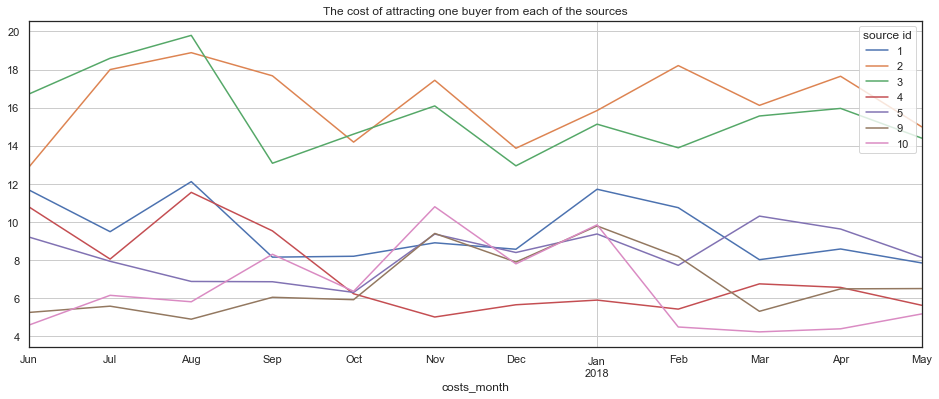

In [78]:
costs_.pivot_table(index = ['costs_month'], columns = 'source id', values = 'cac', aggfunc = 'mean').plot(figsize = (16, 6), title = 'The cost of attracting one buyer from each of the sources')
plt.grid()
plt.show()

In [79]:
costs_id = costs_.pivot_table(
        index='costs_month', 
        columns='source id', 
        values='cac', 
        aggfunc='mean')
 
costs_id

source id,1,2,3,4,5,9,10
costs_month,,,,,,,
2017-06-01,11.681283,12.883568,16.716919,10.792094,9.209676,5.253654,4.590158
2017-07-01,9.491485,18.000253,18.593952,8.054482,7.938157,5.582433,6.151880
2017-08-01,12.118898,18.886449,19.795068,11.554926,6.879620,4.900254,5.813398
2017-09-01,8.155731,17.672249,13.084043,9.533800,6.864844,6.049126,8.306581
2017-10-01,8.202083,14.193003,14.613088,6.233562,6.305969,5.923235,6.362921
2017-11-01,8.908503,17.437690,16.091445,5.013132,9.368019,9.400503,10.801337
2017-12-01,8.570439,13.871086,12.948321,5.656507,8.399174,7.899420,7.803197
2018-01-01,11.719181,15.850151,15.134989,5.901092,9.371755,9.792713,9.851557
2018-02-01,10.752216,18.209325,13.894612,5.428068,7.725369,8.181382,4.489624


In [80]:
cac_mean = costs_.groupby('source id').agg({'cac':'mean'})

<b>Interim findings:</b><br/>
Average CAC by source

In [81]:
cac_mean

,cac
source id,
1,9.489732
2,16.287024
3,15.580474
4,7.271743
5,8.336731
9,6.842532
10,6.555415


<b>Additional calculation</b>

In [82]:
orders.head()

,buy ts,revenue,uid,order_month,first_order_date,first_order_month
0,2017-06-01,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01


In [83]:
costs.head()

,source id,dt,costs,costs_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [84]:
costs_mean_2 = costs.groupby('source id').agg({'costs':'sum'})
costs_mean_2.reset_index()

,source id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [85]:
n_buyers_source = costs_.pivot_table(index = ['source id'], values = 'n_buyers', aggfunc = 'sum')
n_buyers_source.reset_index()

,source id,n_buyers
0,1,2899
1,2,3506
2,3,10473
3,4,10295
4,5,6931
5,9,1088
6,10,1329


In [86]:
costs_mean_2 = pd.merge(costs_mean_2, n_buyers_source, left_on = 'source id', right_index = True)
costs_mean_2

,costs,n_buyers
source id,,
1,20833.27,2899
2,42806.04,3506
3,141321.63,10473
4,61073.60,10295
5,51757.10,6931
9,5517.49,1088
10,5822.49,1329


In [87]:
costs_mean_2['cac_per_source'] = costs_mean_2['costs'] / costs_mean_2['n_buyers']
costs_mean_2

,costs,n_buyers,cac_per_source
source id,,,
1,20833.27,2899,7.186364
2,42806.04,3506,12.209367
3,141321.63,10473,13.493901
4,61073.60,10295,5.932356
5,51757.10,6931,7.467479
9,5517.49,1088,5.071222
10,5822.49,1329,4.381106


In [88]:
#Для сравнения выведем таблицу из предыдущего расчета
cac_mean

,cac
source id,
1,9.489732
2,16.287024
3,15.580474
4,7.271743
5,8.336731
9,6.842532
10,6.555415


<b>Interim conclusions</b><br/>

The recalculation showed the difference between the calculation of the total values and the agrigation by month. Monthly aggregation distorts the total values due to averaging.<br/>
From a business point of view, what does this give us:<br/>
1. Source 1 and 5 in the average price range of 7.1 - 7.4 <br/>
2. Source 9 is one of the cheapest 5 <br/>
3. Source 2 and 3 are the most expensive. And as we will see later - the most inefficient.

#### We calculate the ROMI for cohorts in the context of sources. Let's compare the payback for the same life periods of the cohorts.

In [89]:
users = visits.sort_values('start ts').groupby('uid').first()

In [90]:
users.head()

,device,end ts,source id,start ts,visit_day,visit_week,visit_month,session_year,session_month,session_duration_sec,first_visit,first_visit_month,lifetime
uid,,,,,,,,,,,,,
11863502262781,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,2018-03-01,2018-03-01,2018-03-01,2018,3,360,2018-03-01 17:27:00,2018-03-01,0
49537067089222,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,2018-02-06,2018-02-01,2018-02-01,2018,2,120,2018-02-06 15:55:00,2018-02-01,0
297729379853735,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,2017-06-07,2017-06-01,2017-06-01,2017,6,60,2017-06-07 18:47:00,2017-06-01,0
313578113262317,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017-09-18,2017-09-14,2017-09-01,2017,9,1080,2017-09-18 22:49:00,2017-09-01,0
325320750514679,desktop,2017-09-30 14:38:00,5,2017-09-30 14:29:00,2017-09-30,2017-09-28,2017-09-01,2017,9,540,2017-09-30 14:29:00,2017-09-01,0


In [91]:
client = pd.merge(orders, users[['source id']], on = 'uid', how = 'left')

In [92]:
client.head()

,buy ts,revenue,uid,order_month,first_order_date,first_order_month,source id
0,2017-06-01,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,1
1,2017-06-01,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2
2,2017-06-01,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2
3,2017-06-01,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2
4,2017-06-01,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,3


In [93]:
client['first_order_ts'] = client.groupby('uid')['buy ts'].transform('min')

In [94]:
client['first_order_ts'] = client['first_order_ts'].astype('datetime64[M]')

In [95]:
client.head()

,buy ts,revenue,uid,order_month,first_order_date,first_order_month,source id,first_order_ts
0,2017-06-01,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,1,2017-06-01
1,2017-06-01,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2,2017-06-01
2,2017-06-01,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2,2017-06-01
3,2017-06-01,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2,2017-06-01
4,2017-06-01,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,3,2017-06-01


In [96]:
cohort_source_sizes = client.groupby(['first_order_month', 'source id']).agg({'uid': 'nunique'}).reset_index()
cohort_source_sizes.columns = ['first_order_month', 'source id', 'n_buyers']

In [97]:
cohort_source_sizes.head()

,first_order_month,source id,n_buyers
0,2017-06-01,1,190
1,2017-06-01,2,235
2,2017-06-01,3,638
3,2017-06-01,4,413
4,2017-06-01,5,384


In [98]:
source_cohorts = client.groupby(['first_order_month', 'order_month', 'source id']).agg({'revenue': 'sum'}).reset_index()

In [99]:
source_cohorts.head()

,first_order_month,order_month,source id,revenue
0,2017-06-01,2017-06-01,1,1378.70
1,2017-06-01,2017-06-01,2,1043.68
2,2017-06-01,2017-06-01,3,2804.34
3,2017-06-01,2017-06-01,4,1959.84
4,2017-06-01,2017-06-01,5,1898.89


In [100]:
source_cohorts.columns = ['first_order_month', 'order_month', 'source id', 'revenue']

In [101]:
source_cohorts.head()

,first_order_month,order_month,source id,revenue
0,2017-06-01,2017-06-01,1,1378.70
1,2017-06-01,2017-06-01,2,1043.68
2,2017-06-01,2017-06-01,3,2804.34
3,2017-06-01,2017-06-01,4,1959.84
4,2017-06-01,2017-06-01,5,1898.89


In [102]:
source_report = pd.merge(cohort_source_sizes, source_cohorts, on = ['first_order_month', 'source id'])

In [103]:
source_report.head()

,first_order_month,source id,n_buyers,order_month,revenue
0,2017-06-01,1,190,2017-06-01,1378.70
1,2017-06-01,1,190,2017-07-01,414.98
2,2017-06-01,1,190,2017-08-01,419.43
3,2017-06-01,1,190,2017-09-01,714.24
4,2017-06-01,1,190,2017-10-01,811.20


In [104]:
source_report['age'] = ((source_report['order_month'] - source_report['first_order_month']) / np.timedelta64(1, 'M')).round().astype('int')

In [105]:
source_report['ltv'] = source_report.revenue / source_report.n_buyers

In [106]:
source_report.head()

,first_order_month,source id,n_buyers,order_month,revenue,age,ltv
0,2017-06-01,1,190,2017-06-01,1378.70,0,7.256316
1,2017-06-01,1,190,2017-07-01,414.98,1,2.184105
2,2017-06-01,1,190,2017-08-01,419.43,2,2.207526
3,2017-06-01,1,190,2017-09-01,714.24,3,3.759158
4,2017-06-01,1,190,2017-10-01,811.20,4,4.269474


In [107]:
source_ltv = source_report.pivot_table(index = ['first_order_month', 'source id'], columns = 'age', values = 'ltv', aggfunc = 'sum').cumsum(axis = 1)

In [108]:
source_ltv.loc['2017-08-01'].fillna('')

age                                0        1        2        3        4   \
first_order_month source id                                                 
2017-08-01        1          7.493363  8.69062  9.70088  10.6657   11.705   
                  2          5.738862   6.6748  6.85309  7.10398  7.61911   
                  3          5.078635  5.23341  5.52136  5.62834  5.79039   
                  4          5.064970  5.23364  5.36456  5.63172  5.77802   
                  5          5.050139  5.80236  6.63414  7.34447  8.42417   
                  7          1.220000                                       
                  9          4.074918  4.27328  4.91393  5.14508  5.19918   
                  10         4.997297  5.10946  5.43973                     

age                               5        6        7        8        9  10 11  
first_order_month source id                                                     
2017-08-01        1          12.3713  13.0515  15.7087  17.9019  18.6806        
                  2           7.6822   7.8039  8.19699  8.23016  8.31455        
                  3          5.83967  5.90412  5.99685  6.07555  6.13647        
                  4           5.9868  6.06997   6.2595  6.35225  6.47547        
                  5          9.01881  9.40392  9.65014  9.88792  10.1225        
                  7                                                             
                  9          5.26705  5.40328  5.69377  5.77492  5.92525        
                  10                           5.56351           5.65432

In [109]:
ltv_source = source_ltv.reset_index().groupby(['source id'])[5].mean().reset_index()
ltv_source.columns = ['source id', 'ltv_6m']

In [110]:
romi_report = pd.merge(source_report, cac_mean, on = 'source id')

In [111]:
romi_report.head()

,first_order_month,source id,n_buyers,order_month,revenue,age,ltv,cac
0,2017-06-01,1,190,2017-06-01,1378.70,0,7.256316,9.489732
1,2017-06-01,1,190,2017-07-01,414.98,1,2.184105,9.489732
2,2017-06-01,1,190,2017-08-01,419.43,2,2.207526,9.489732
3,2017-06-01,1,190,2017-09-01,714.24,3,3.759158,9.489732
4,2017-06-01,1,190,2017-10-01,811.20,4,4.269474,9.489732


In [112]:
romi_report['romi'] = romi_report.ltv / romi_report.cac

In [113]:
# for the jquery method to work correctly
romi_report['source_id'] = romi_report['source id']
romi_report['first_order_month'] = romi_report['first_order_month'].dt.strftime('%Y-%m')

In [114]:
romi_report.head()

,first_order_month,source id,n_buyers,order_month,revenue,age,ltv,cac,romi,source_id
0,2017-06,1,190,2017-06-01,1378.70,0,7.256316,9.489732,0.764649,1
1,2017-06,1,190,2017-07-01,414.98,1,2.184105,9.489732,0.230155,1
2,2017-06,1,190,2017-08-01,419.43,2,2.207526,9.489732,0.232623,1
3,2017-06,1,190,2017-09-01,714.24,3,3.759158,9.489732,0.396129,1
4,2017-06,1,190,2017-10-01,811.20,4,4.269474,9.489732,0.449905,1


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 <a list of 12 Text major ticklabel objects>)

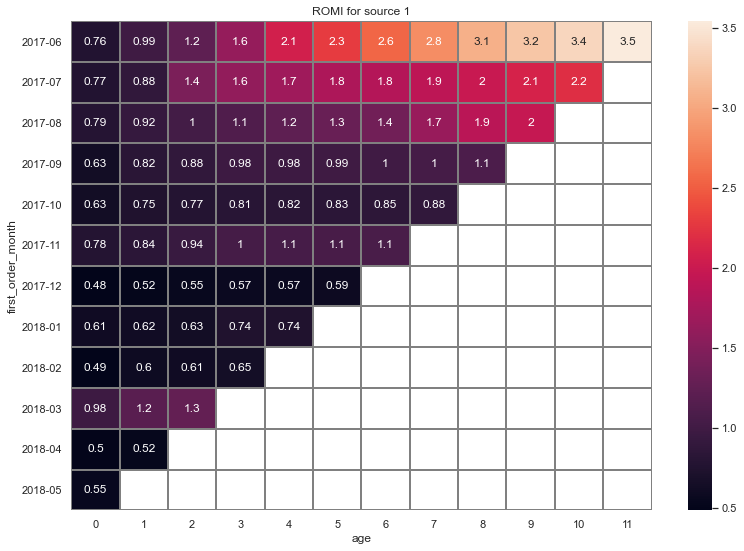

In [115]:
romi_1 = romi_report.query('source_id == 1')
romi_1 = romi_1.pivot_table(index = 'first_order_month', columns = 'age', values = 'romi')
romi_1 = romi_1.cumsum(axis=1)
 
plt.figure(figsize=(13, 9))
plt.title('ROMI for source 1')
sns.heatmap(romi_1, annot=True, linewidths=1, linecolor='gray')
plt.yticks(rotation = 0)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 <a list of 12 Text major ticklabel objects>)

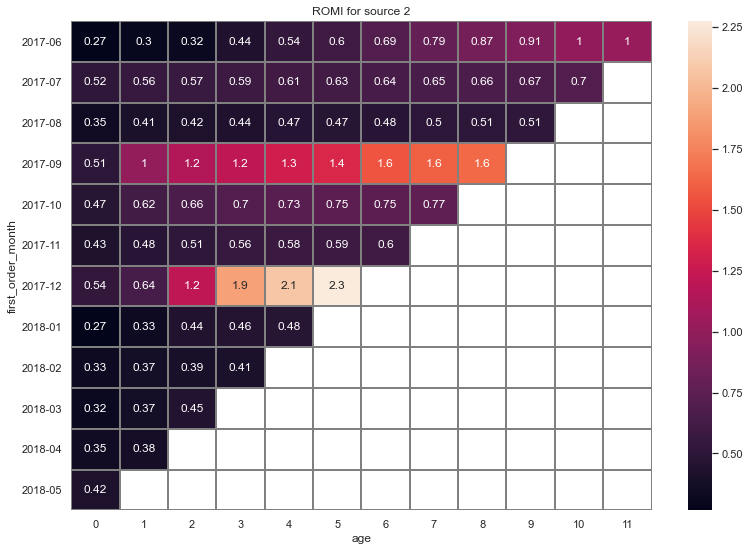

In [116]:
romi_2 = romi_report.query('source_id == 2')
romi_2 = romi_2.pivot_table(index = 'first_order_month', columns = 'age', values = 'romi')
romi_2 = romi_2.cumsum(axis=1)
 
plt.figure(figsize=(13, 9))
plt.title('ROMI for source 2')
sns.heatmap(romi_2, annot=True, linewidths=1, linecolor='gray')
plt.yticks(rotation = 0)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 <a list of 12 Text major ticklabel objects>)

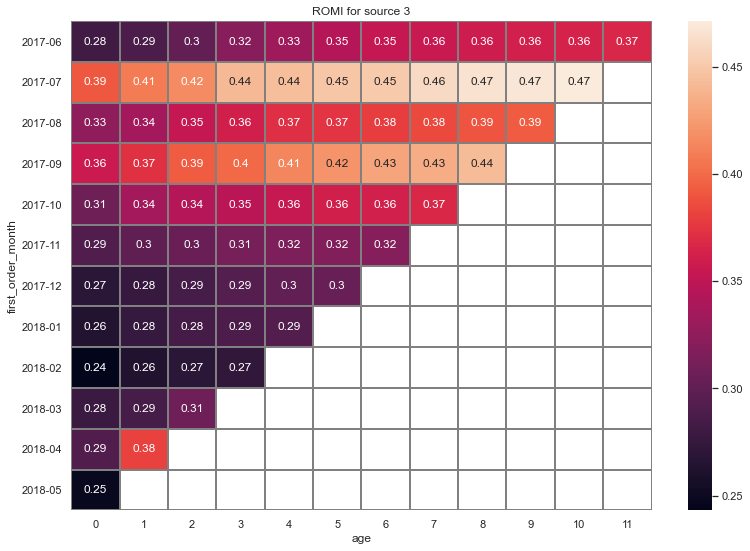

In [117]:
romi_3 = romi_report.query('source_id == 3')
romi_3 = romi_3.pivot_table(index = 'first_order_month', columns = 'age', values = 'romi')
romi_3 = romi_3.cumsum(axis=1)
 
plt.figure(figsize=(13, 9))
plt.title('ROMI for source 3')
sns.heatmap(romi_3, annot=True, linewidths=1, linecolor='gray')
plt.yticks(rotation = 0)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 <a list of 13 Text major ticklabel objects>)

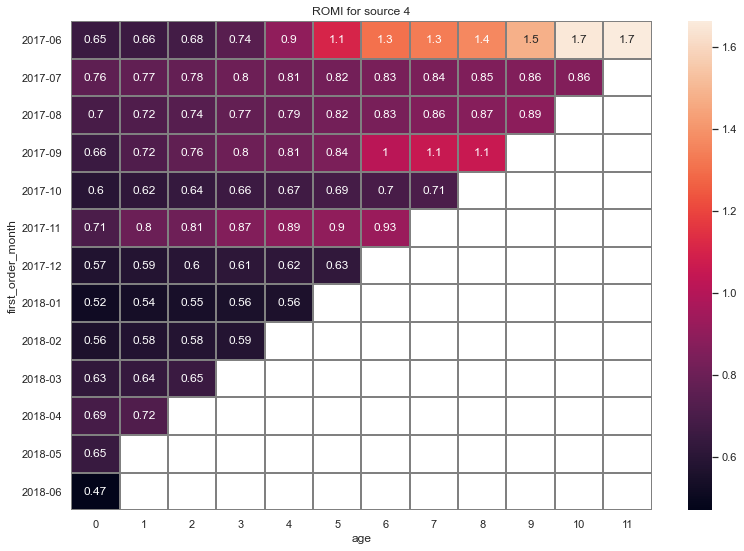

In [118]:
romi_4 = romi_report.query('source_id == 4')
romi_4 = romi_4.pivot_table(index = 'first_order_month', columns = 'age', values = 'romi')
romi_4 = romi_4.cumsum(axis=1)
 
plt.figure(figsize=(13, 9))
plt.title('ROMI for source 4')
sns.heatmap(romi_4, annot=True, linewidths=1, linecolor='gray')
plt.yticks(rotation = 0)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 <a list of 12 Text major ticklabel objects>)

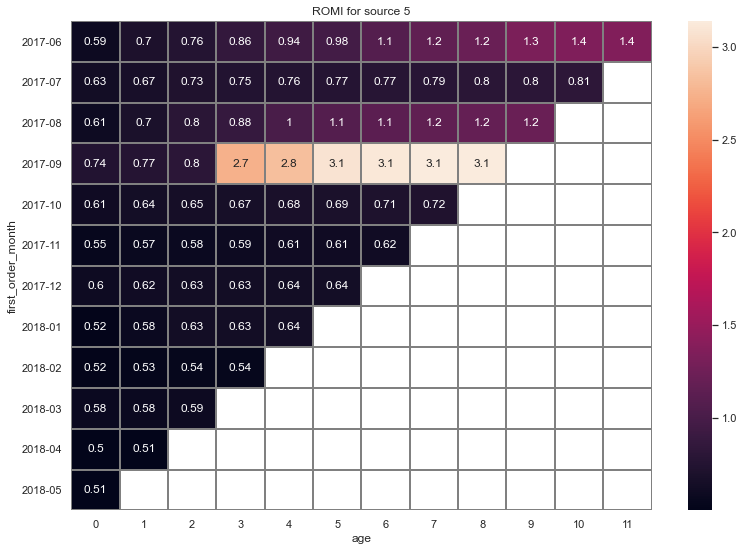

In [119]:
romi_5 = romi_report.query('source_id == 5')
romi_5 = romi_5.pivot_table(index = 'first_order_month', columns = 'age', values = 'romi')
romi_5 = romi_5.cumsum(axis=1)
 
plt.figure(figsize=(13, 9))
plt.title('ROMI for source 5')
sns.heatmap(romi_5, annot=True, linewidths=1, linecolor='gray')
plt.yticks(rotation = 0)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 <a list of 12 Text major ticklabel objects>)

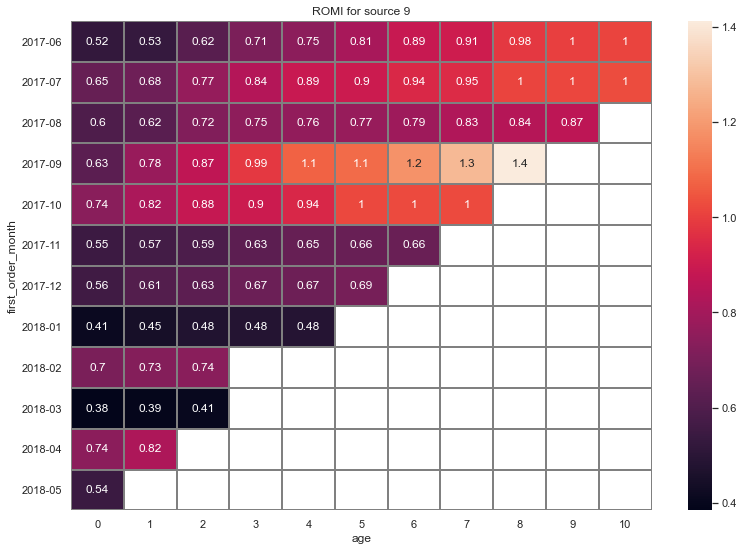

In [120]:
romi_9 = romi_report.query('source_id == 9')
romi_9 = romi_9.pivot_table(index = 'first_order_month', columns = 'age', values = 'romi')
romi_9 = romi_9.cumsum(axis=1)
 
plt.figure(figsize=(13, 9))
plt.title('ROMI for source 9')
sns.heatmap(romi_9, annot=True, linewidths=1, linecolor='gray')
plt.yticks(rotation = 0)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 <a list of 12 Text major ticklabel objects>)

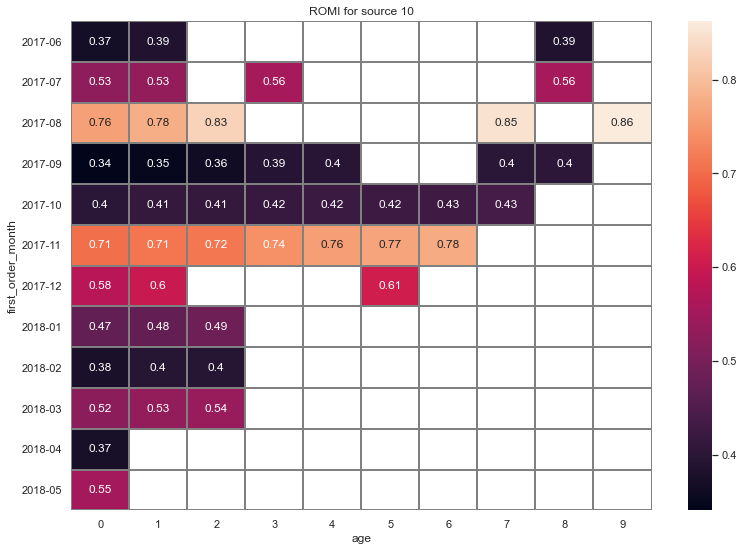

In [121]:
romi_10 = romi_report.query('source_id == 10')
romi_10 = romi_10.pivot_table(index = 'first_order_month', columns = 'age', values = 'romi')
romi_10 = romi_10.cumsum(axis=1)
 
plt.figure(figsize=(13, 9))
plt.title('ROMI for source 10')
sns.heatmap(romi_10, annot=True, linewidths=1, linecolor='gray')
plt.yticks(rotation = 0)

<b>Interim findings:</b><br/>
For the first (1) source:<br/>
The 2017-06 cohort paid off in 3 months of life<br/>
The 2017-07 cohort paid off in 3 months of life<br/>
The 2017-08 cohort paid off in 3 months of life<br/>
The 2017-09 cohort paid off at 7 months of life<br/>
The 2017-10 cohort didn't pay off<br/>
Cohort 2017-11 paid off in 4 months of life<br/>
The 2017-12 cohort didn't pay off<br/>
The 2018-01 cohort didn't pay off<br/>
The 2018-02 cohort didn't pay off<br/>
Cohort 2018-03 paid off in 2 months of life<br/>
The 2018-04 cohort didn't pay off<br/>
The 2018-05 cohort didn't pay off<br/>

For the second (2) source:<br/>
The 2017-06 cohort paid off at 11 months of life<br/>
The 2017-07 cohort didn't pay off<br/>
The 2017-08 cohort didn't pay off<br/>
The 2017-09 cohort paid off in 2 months of life<br/>
The 2017-10 cohort didn't pay off<br/>
The 2017-11 cohort didn't pay off<br/>
Cohort 2017-12 paid off in 3 months of life<br/>
The 2018-01 cohort didn't pay off<br/>
The 2018-02 cohort didn't pay off<br/>
The 2018-03 cohort didn't pay off<br/>
The 2018-04 cohort didn't pay off<br/>
The 2018-05 cohort didn't pay off<br/>

For the third (3) source, no cohort paid off.<br/>


For the fourth (4) source:<br/>
The 2017-06 cohort paid off at 6 months of life<br/>
The 2017-07 cohort didn't pay off<br/>
The 2017-08 cohort didn't pay off<br/>
The 2017-09 cohort paid off at 7 months of life<br/>
The 2017-10 cohort didn't pay off<br/>
The 2017-11 cohort didn't pay off<br/>
The 2017-12 cohort didn't pay off<br/>
The 2018-01 cohort didn't pay off<br/>
The 2018-02 cohort didn't pay off<br/>
The 2018-03 cohort didn't pay off<br/>
The 2018-04 cohort didn't pay off<br/>
The 2018-05 cohort didn't pay off<br/>

For the fifth (5) source:<br/>
The 2017-06 cohort paid off at 7 months of life<br/>
The 2017-07 cohort didn't pay off<br/>
The 2017-08 cohort paid off in 5 months of life<br/>
The 2017-09 cohort paid off in 4 months of life<br/>
The 2017-10 cohort didn't pay off<br/>
The 2017-11 cohort didn't pay off<br/>
The 2017-12 cohort didn't pay off<br/>
The 2018-01 cohort didn't pay off<br/>
The 2018-02 cohort didn't pay off<br/>
The 2018-03 cohort didn't pay off<br/>
The 2018-04 cohort didn't pay off<br/>
The 2018-05 cohort didn't pay off<br/>

For the ninth (9) source:<br/>
The 2017-06 cohort paid off at 10 months of life<br/>
The 2017-07 cohort paid off at 9 months of life<br/>
The 2017-08 cohort didn't pay off<br/>
The 2017-09 cohort paid off in 5 months of life<br/>
Cohort 2017-10 paid off at 6 months of life<br/>
The 2017-11 cohort didn't pay off<br/>
The 2017-12 cohort didn't pay off<br/>
The 2018-01 cohort didn't pay off<br/>
The 2018-02 cohort didn't pay off<br/>
The 2018-03 cohort didn't pay off<br/>
The 2018-04 cohort didn't pay off<br/>
The 2018-05 cohort didn't pay off<br/>

For the tenth (10) source, no cohort paid off.

### Let's describe the conclusions and recommendations

#### Traffic sources that marketers should focus on.

It is worth focusing on the traffic source number 1.
As the romi indicators in each cohort are growing. And over time, they pay for themselves multiple times.<br/>
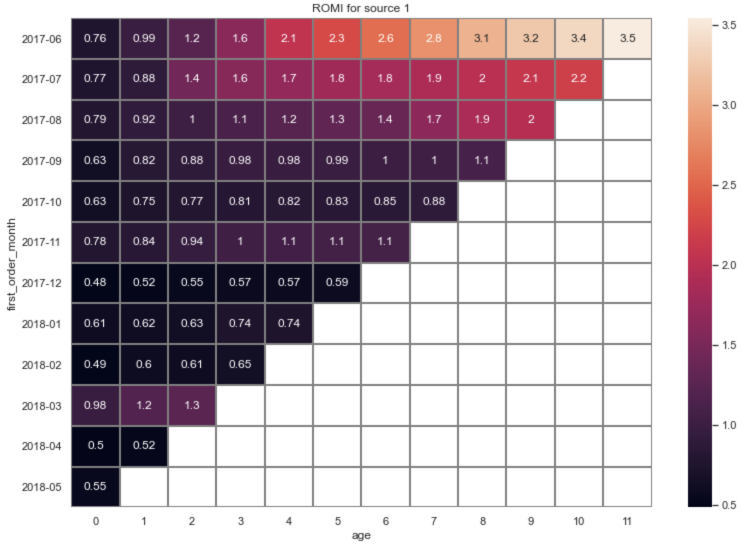
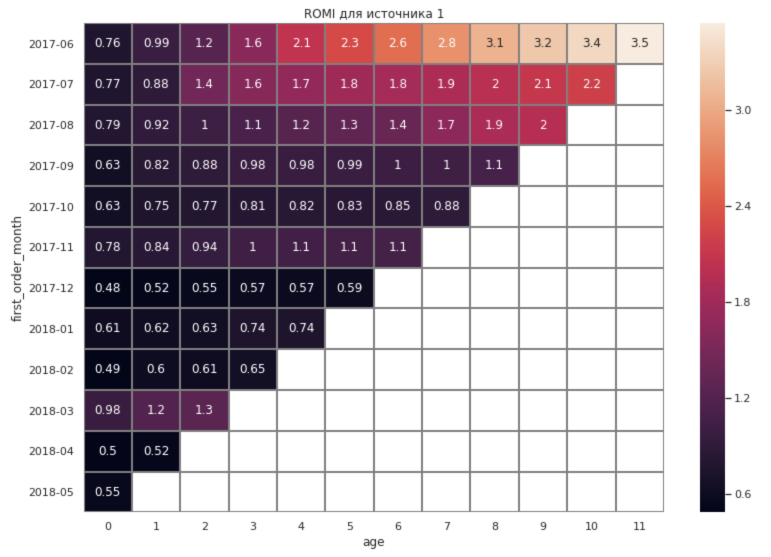

You should also pay attention to the traffic source number 5.
Romi grows over time for cohorts.<br/>
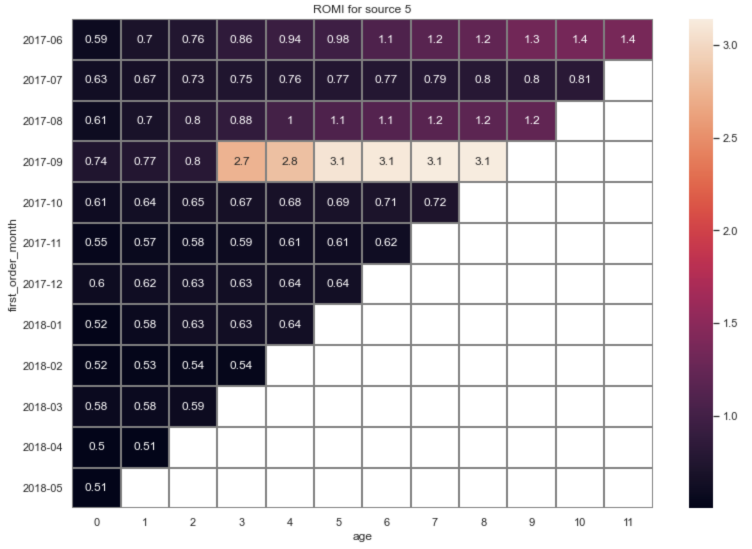
<br/>
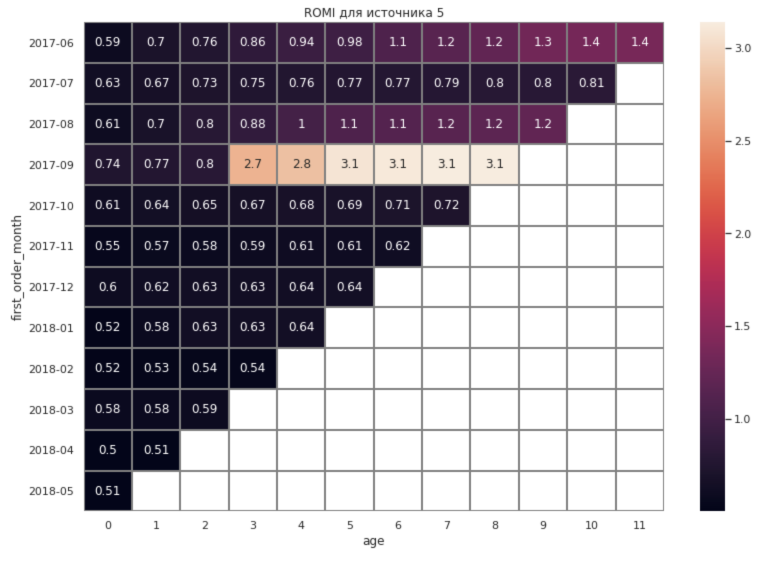

Source number 9 also has a positive trend and pays off over time.<br/>
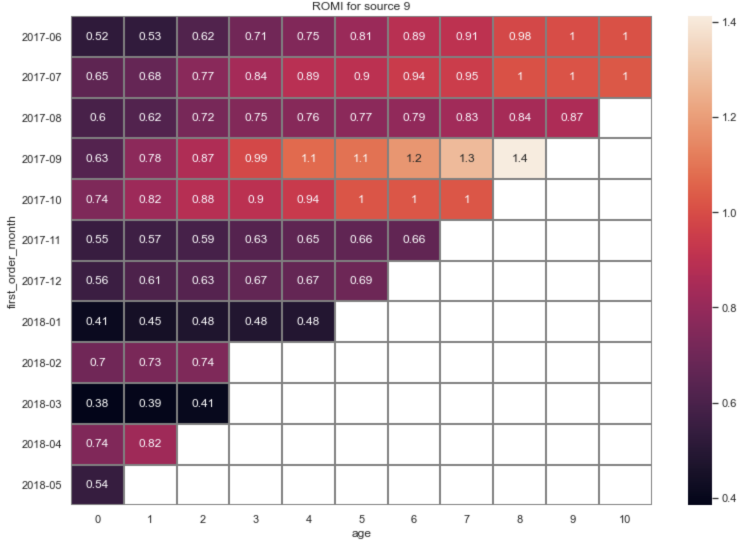
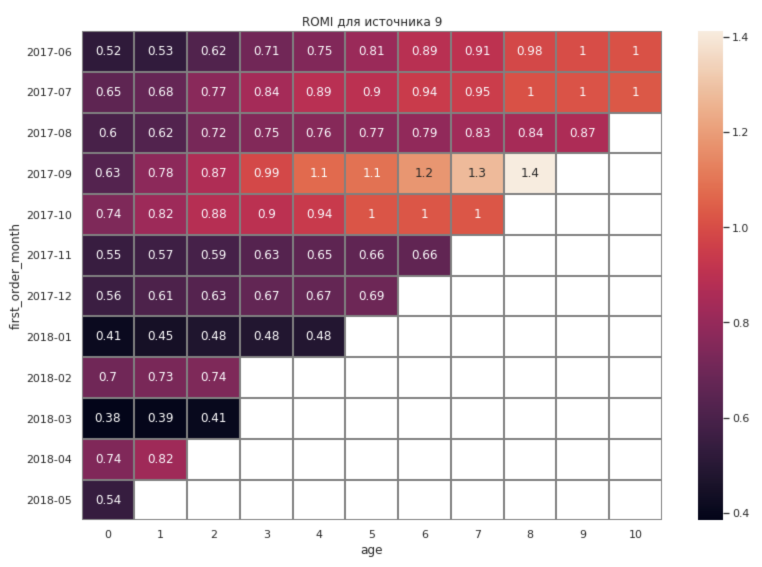

You should also pay attention to sources 2 and 4. Since some cohorts show growth.<br/>
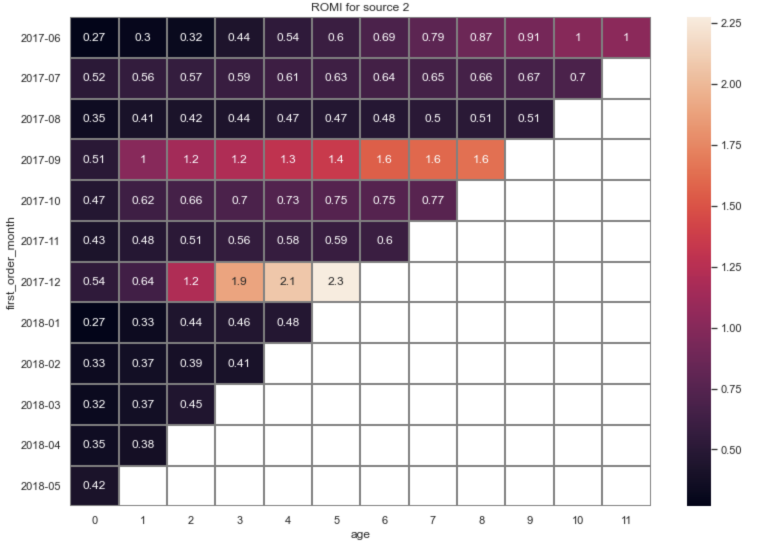
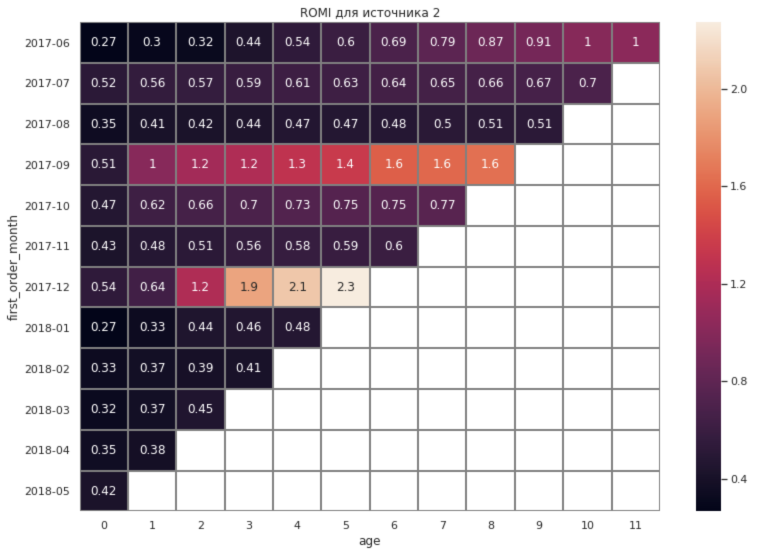

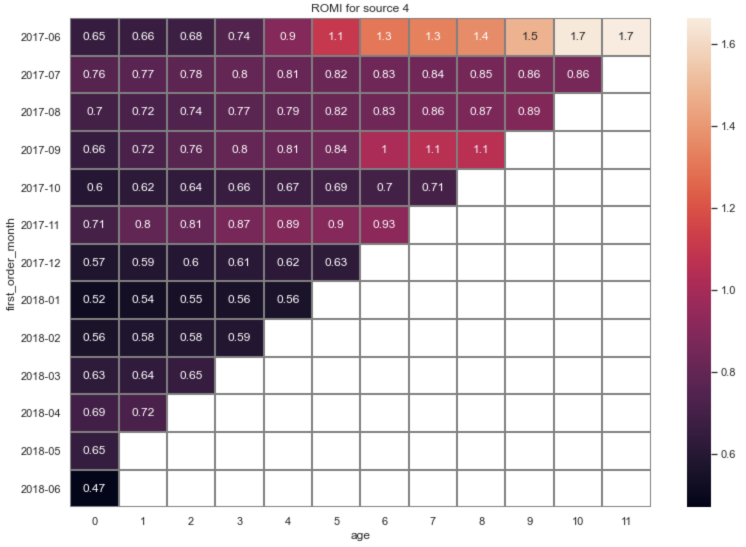
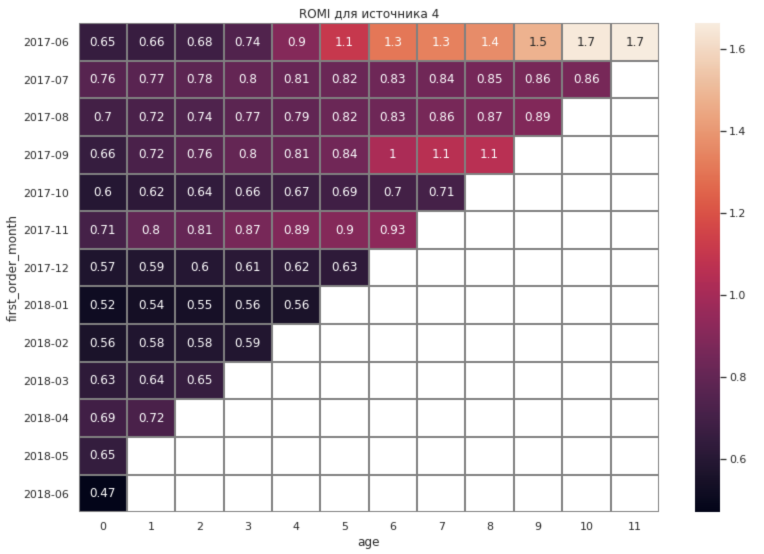

The rest of the sources are unprofitable. The recommendation is to focus on 1, 5, 9 sources.

#### We will describe the conclusions that we made after calculating the metrics of each type.

<b>Product metrics.</b><br/>

<b>DAU, DAU, and MAU.</b><br/>

All-time average DAU value - 907.99<br/>
Average value of WAU for all time - 5716.24<br/>
Average MAU value for all time - 23228.41<br/>

2017-12 we see a significant increase in DAU. Probably everyone remembered about the upcoming holidays.<br/>

From August 2017 to the end of 2017, we see an increase in MAU. This may be due to the fact that users are returning after a summer vacation. Also, students and schoolchildren can make up a large part of this audience. Since in 2018, the MAU again decreases closer to the summer months.

<b>The number of user visits per day.</b>

On average, users visit the site 1 time a day or more. The average values for the observed period are approximately equal.

The values increase slightly in the winter months, similar to the MAU.

<b>The amount of time that users spend on the site.</b><br/>

Most of the sessions are quite short.<br/>
Average session duration: 643.5 seconds, about 10-11 minutes.<br/>
Therefore, we need the user to make a purchase within 10 minutes.

<b>Average Retention Rate for the second month of the cohort's life.</b>

Average Retention Rate for the second month of cohort's life :<br/>
  2017-06-01  7.9%<br/>
  2017-07-01  5.6%<br/>
  2017-08-01  7.7%<br/>
  2017-09-01  8.5%<br/>
  2017-10-01  7.9%<br/>
  2017-11-01  7.8%<br/>
  2017-12-01  5.6%<br/>
  2018-01-01  6.0%<br/>
  2018-02-01  5.7%<br/>
  2018-03-01  4.2%<br/>
  2018-04-01  4.8%<br/>
    2018-05-01 nas<br/>

The 2017 cohorts have higher return rates that match the MAU. Probably for the same reasons.

<b>Business metrics</b>

The average amount of time that passes from the first visit to the site to the purchase: 16.5 days.<br/>
The average number of purchases per customer, for the entire period, is about 1.5.<br/>
The average check grows over time.<br/>

This means that we need to build long-term relationships with customers.<br/>

Average LTV by cohort for 6 months<br/>
<br/>
2017-06 8.36008<br/>
2017-07 7.66077<br/>
2017-08 7.37586<br/>
2017-09 12.3065<br/>
2017-10 6.15996<br/>
2017-11 6.28032<br/>
2017-12 7.63991<br/>
<br/>
The remaining cohorts were less than 6 months old at the time of data collection.

<b>Marketing metrics</b>

Total marketing expenses 24800.19<br/>
The costs between the sources are distributed as follows:<br/>
<br/>
1 - 3425.793072<br/>
2 - 5895.902521<br/>
3 - 5655.712208<br/>
4 - 2632.370879<br/>
5 - 3026.233245<br/>
9 - 2066.444625<br/>
10 - 2097.732793<br/>

1 - 9.489732<br/>
2 - 16.287024<br/>
3 - 15.580474<br/>
4 - 7.271743<br/>
5 - 8.336731<br/>
9 - 6.842532<br/>
10 - 6.555415<br/>

For the first (1) source:<br/>
The 2017-06 cohort paid off at 3 months of life<br/>
The 2017-07 cohort paid off at 3 months of life<br/>
The 2017-08 cohort paid off in 3 months of life<br/>
The 2017-09 cohort paid off at 7 months of life<br/>
The 2017-11 cohort paid off at 4 months of life<br/>
Cohort 2018-03 paid off in 2 months of life<br/>
<br/>
For the second (2) source:<br/>
The 2017-06 cohort paid off at 11 months of life<br/>
The 2017-09 cohort paid off at 2 months of life<br/>
Cohort 2017-12 paid off at 3 months of life<br/>
<br/>
For the fourth (4) source:<br/>
The 2017-06 cohort paid off at 6 months of life<br/>
The 2017-09 cohort paid off at 7 months of life<br/>
<br/>
For the fifth (5) source:<br/>
The 2017-06 cohort paid off at 7 months of life<br/>
The 2017-08 cohort paid off at 5 months of life<br/>
The 2017-09 cohort paid off at 4 months of life<br/>
<br/>
For the ninth (9) source:<br/>
The 2017-06 cohort paid off at 10 months of life<br/>
The 2017-07 cohort paid off at 9 months of life<br/>
The 2017-09 cohort paid off at 5 months of life<br/>
Cohort 2017-10 paid off at 6 months of life<br/>